# Tracking Global Terrorist Attacks 1970-2018

In [71]:
# Standard Libraries
import os 
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

# Specific Libraries
import sklearn.linear_model as linear_model
import sklearn.preprocessing as preprocessing 
from sklearn import tree, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [72]:
terrorism = pd.read_csv("globalterrorism.csv", engine='python', index_col = 'eventid')

The Column variables for the dataset explained:

eventid - A 12-digit EVENT ID system. First 8 #s are 'yyyymmdd' and last 4 #s are sequential

iyear - The year in which the incident occured

imonth - The month in which the incident occured

iday - The day of the month in which the incident occured.

approxdate - The approximate date of the incident

extended - Whether the duration of the incident extended more than 24 hrs (Yes) or not (No) 

country - The country code

country_txt - The country or location where the incident occured

region - Identifies the region code based on the 12 regions

region_txt - Identifies the region in which the incident occured

addnotes - The # of casualties for each incident

In [73]:
terrorism

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
eventid,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201812310030,2018,12,31,NaN,0,NaN,4,Afghanistan,6,South Asia,...,NaN,"""Afghan War Casualty Report: Dec. 28-Jan. 3,"" ...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
201812310031,2018,12,31,NaN,0,NaN,4,Afghanistan,6,South Asia,...,NaN,"""Afghan War Casualty Report: Dec. 28-Jan. 3,"" ...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
201812310032,2018,12,31,NaN,0,NaN,4,Afghanistan,6,South Asia,...,NaN,"""Afghan War Casualty Report: Dec. 28-Jan. 3,"" ...",NaN,NaN,START Primary Collection,0,0,0,0,NaN


In [74]:
terrorism = terrorism.rename(columns = {'addnotes':'Casualties', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':'Region', })

In [75]:
terrorism

,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,...,Casualties,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
eventid,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201812310030,2018,12,31,NaN,0,NaN,4,Afghanistan,6,South Asia,...,NaN,"""Afghan War Casualty Report: Dec. 28-Jan. 3,"" ...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
201812310031,2018,12,31,NaN,0,NaN,4,Afghanistan,6,South Asia,...,NaN,"""Afghan War Casualty Report: Dec. 28-Jan. 3,"" ...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
201812310032,2018,12,31,NaN,0,NaN,4,Afghanistan,6,South Asia,...,NaN,"""Afghan War Casualty Report: Dec. 28-Jan. 3,"" ...",NaN,NaN,START Primary Collection,0,0,0,0,NaN


In [76]:
terrorism.describe()

,Year,Month,Day,extended,country,region,latitude,longitude,specificity,vicinity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,191464.000000,191464.000000,191464.000000,191464.000000,191464.000000,191464.000000,186884.000000,186883.000000,191463.000000,191464.000000,...,1.416000e+03,6.230000e+02,8.380000e+02,611.000000,12045.000000,11454.000000,191464.000000,191464.000000,191464.000000,191464.000000
mean,2003.420136,6.462510,15.507688,0.047476,131.290446,7.205167,23.462121,28.902126,1.458172,0.069151,...,3.057619e+06,5.227734e+05,6.961705e+05,217.004910,4.643005,-29.816309,-4.521727,-4.439247,0.088951,-3.930582
std,13.349405,3.388515,8.807727,0.212656,112.058063,2.923811,18.405309,57.231040,0.991536,0.284292,...,2.951278e+07,6.730057e+06,9.792528e+06,2796.042504,2.034429,65.183303,4.543713,4.639931,0.556741,4.689726
min,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,-9.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1991.000000,4.000000,8.000000,0.000000,78.000000,6.000000,11.274796,7.052742,1.000000,0.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2010.000000,6.000000,15.000000,0.000000,98.000000,7.000000,31.445840,43.471427,1.000000,0.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2015.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.621521,68.783077,1.000000,0.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2018.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,1.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2912.000000,1.000000,1.000000,1.000000,1.000000


Countries and Regions attacked the most by Terrorist Attacks

In [77]:
print(f"Terrorist attacks were commited frequently in {terrorism.Country.value_counts().index[0]} with {terrorism.Country.value_counts().max()} attacks")

Terrorist attacks were commited frequently in Iraq with 26057 attacks


In [78]:
print('The other 4 countries following Iraq with the highest terrorist attacks are:')
for i in range(1,5):
    print(f"{i+1}. {terrorism.Country.value_counts().index[i]} with {terrorism.Country.value_counts()[i]} attacks")

The other 4 countries following Iraq with the highest terrorist attacks are:
2. Pakistan with 14847 attacks
3. Afghanistan with 14509 attacks
4. India with 12853 attacks
5. Colombia with 8515 attacks


<AxesSubplot:ylabel='Country'>

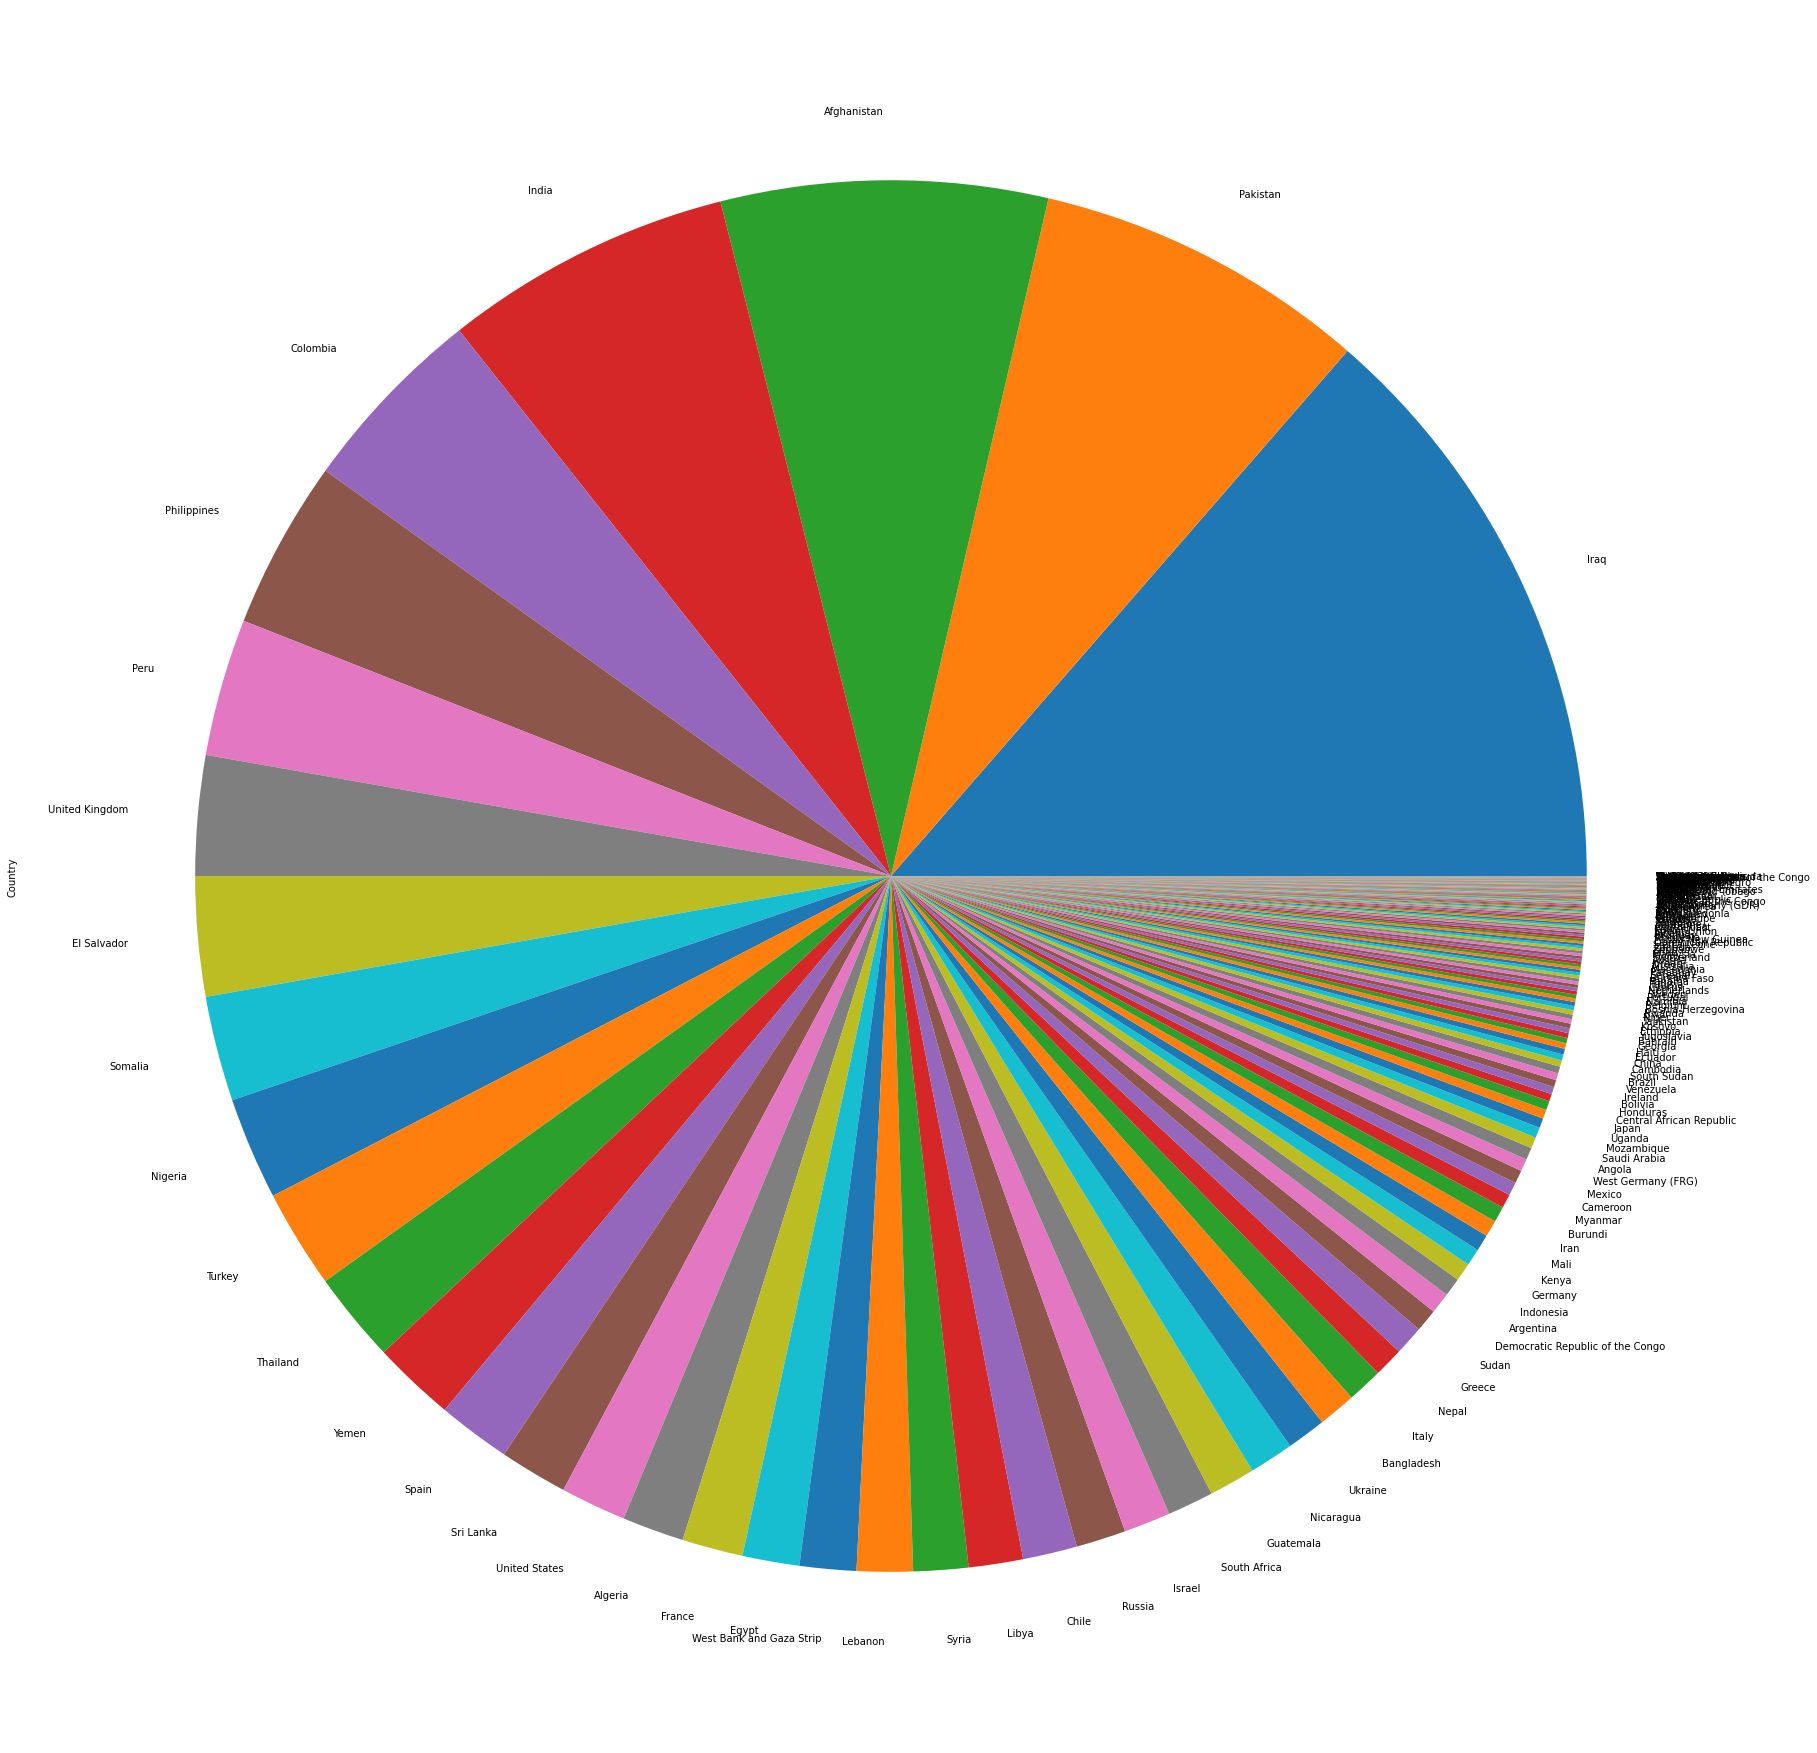

In [97]:
terrorism['Country'].value_counts().plot(kind='pie', figsize=(32,32))

The pie chart really captures the percentages of terrorist attacks occuring in each country.Surprisingly, The United Kingdom is in the Top 10 which is quite telling as countries like Nigeria, Turkey, and Yemen follow afterwards.

In [79]:
print(f"The region that highest terrorist attacks were commited in {terrorism.Region.value_counts().index[0]} with {terrorism.Region.value_counts().max()} attacks")

The region that highest terrorist attacks were commited in Middle East & North Africa with 53110 attacks


In [80]:
print('The other regions that follow the Middle East and North Africa are:')
for i in range(1,5):
    print(f"{i+1}. {terrorism.Region.value_counts().index[i]} with {terrorism.Region.value_counts()[i]} attacks")

The other regions that follow the Middle East and North Africa are:
2. South Asia with 48266 attacks
3. Sub-Saharan Africa with 19752 attacks
4. South America with 19292 attacks
5. Western Europe with 16843 attacks


<AxesSubplot:>

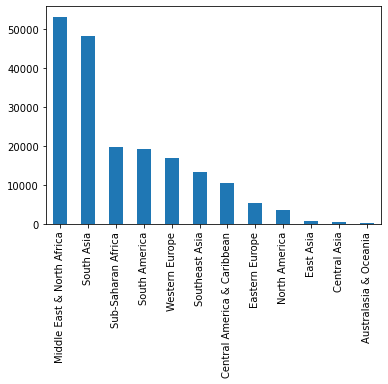

In [92]:
terrorism['Region'].value_counts().plot(kind='bar')

In [81]:
print(f" # of Terrorist attacks that have occured in each country{terrorism.Country.value_counts().index[0]} with {terrorism.Country.value_counts()} ")

 # of Terrorist attacks that have occured in each countryIraq with Iraq             26057
Pakistan         14847
Afghanistan      14509
India            12853
Colombia          8515
                 ...  
International        1
Andorra              1
Vatican City         1
New Hebrides         1
St. Lucia            1
Name: Country, Length: 205, dtype: int64 


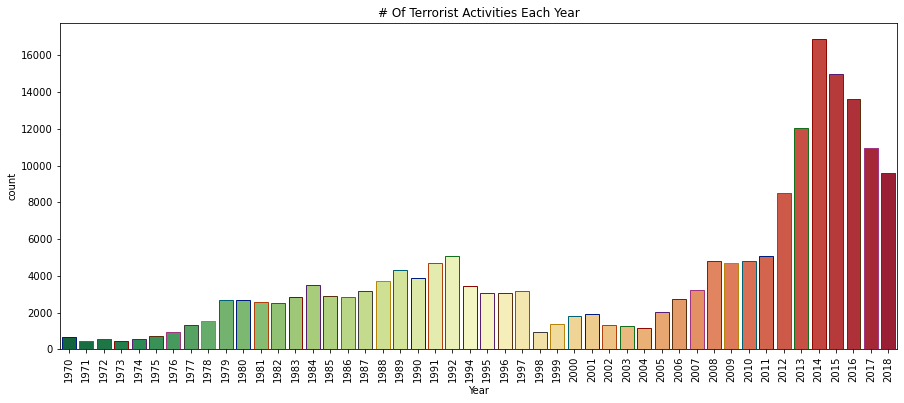

In [82]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terrorism,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('# Of Terrorist Activities Each Year')
plt.show()

As seen on the bar charts, the # of terrorist activities peaked in 2014.1993 was the only year where there was no terrorist attacks.Throughout the 1970s, terrorist activities seemed minimal before gradually increasing going into the 1980s. Terrorist activities seemed to noticeably decrease towards the end of the 1990s going into the 2000s before picking up later rapidly as opposed to the 1970s-1980s.

In [105]:
terrorism['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2661
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3720
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3199
1998      934
1999     1395
2000     1824
2001     1913
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4722
2010     4826
2011     5076
2012     8529
2013    12041
2014    16908
2015    14977
2016    13626
2017    10980
2018     9607
Name: Year, dtype: int64

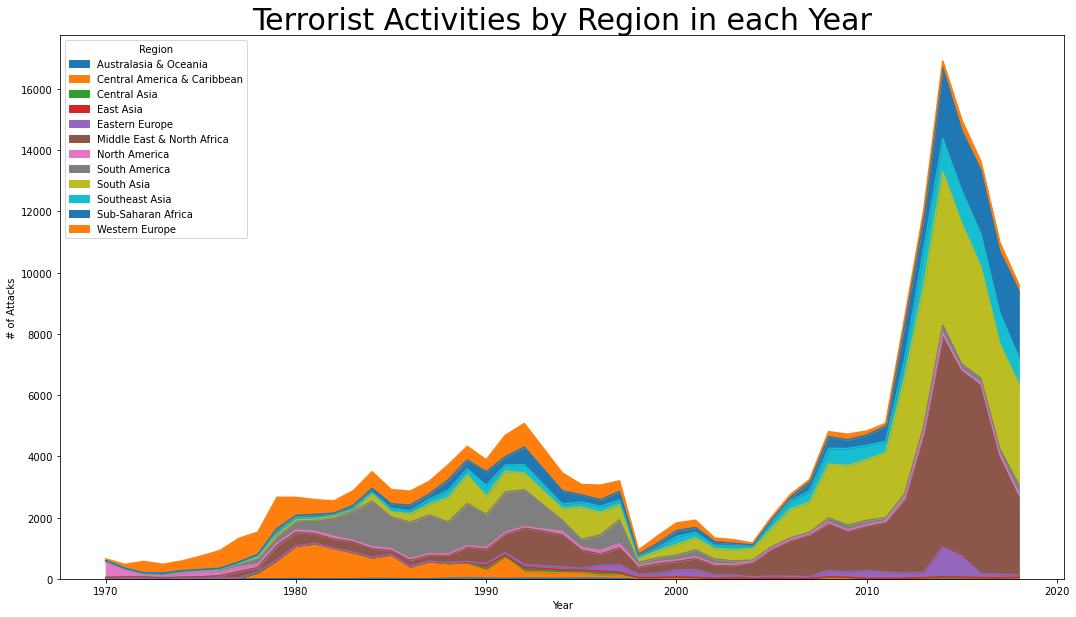

In [109]:
pd.crosstab(terrorism.Year, terrorism.Region).plot(kind='area', figsize = (18,10))
plt.title('Terrorist Activities by Region in each Year', fontsize = 30)
plt.ylabel('# of Attacks')
plt.show()

In [98]:
target_type_count = terrorism['targtype1_txt'].value_counts()
target_type_counts = target_type_count.to_frame()
target_type_counts = target_type_counts.reset_index()
target_type_counts.rename(columns = {'index': 'Target Type', 'targtype1_txt': 'Occurences'}, inplace = True)

In [99]:
target_type_counts

,Target Type,Occurences
0,Private Citizens & Property,46283
1,Military,29978
2,Police,26023
3,Government (General),22274
4,Business,21277
5,Transportation,6929
6,Unknown,6449
7,Utilities,6158
8,Religious Figures/Institutions,4693
9,Educational Institution,4500


# Private Citizens and Private Property were often attacked more than the Military, Police and Government

<AxesSubplot:>

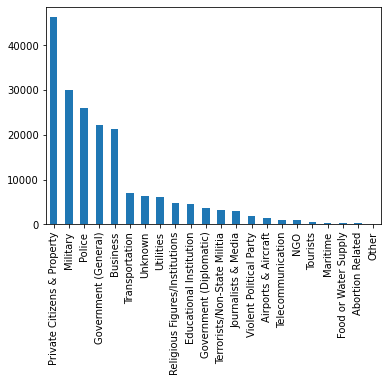

In [100]:
terrorism['targtype1_txt'].value_counts().plot(kind='bar')

In [101]:
weapons_count = terrorism['weaptype1_txt'].value_counts()
weapons_counts = weapons_count.to_frame()
weapons_counts = weapons_counts.reset_index()
weapons_counts.rename(columns={'index': 'Weapon Type', 'weaptype1_txt': 'Occurences'}, inplace = True)

In [102]:
weapons_counts

,Weapon Type,Occurences
0,Explosives,96407
1,Firearms,61885
2,Unknown,16621
3,Incendiary,11791
4,Melee,3905
5,Chemical,336
6,Sabotage Equipment,158
7,Vehicle (not to include vehicle-borne explosiv...,153
8,Other,127
9,Biological,35


# Explosives and Firearms were often the weapons used in terrorist activities.

<AxesSubplot:>

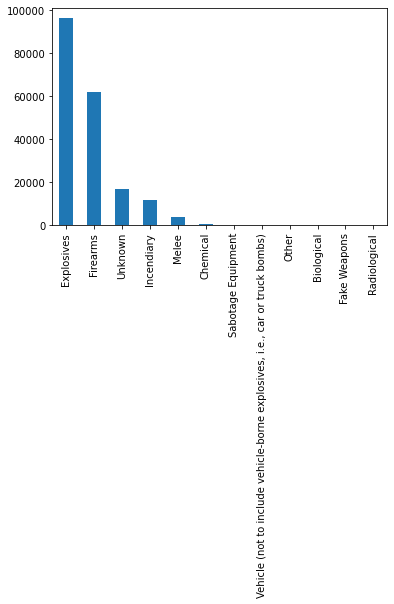

In [104]:
terrorism['weaptype1_txt'].value_counts().plot(kind='bar')